In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = 'DATAPLAY_intern_student_data.xlsx'
data = pd.read_excel(file_path)

In [3]:
# Display the first few rows of the dataframe
print(data.head())

                Timestamp             Name      Name_Title Gender Offer Sent  \
0 2024-02-05 17:13:08.176     Harsh Tanwar    Harsh Tanwar      M        NaN   
1 2024-02-07 11:45:11.396  Nishita Sharma   Nishita Sharma      F        NaN   
2 2024-02-07 21:45:26.809  Aurangjeb Alam   Aurangjeb Alam      M        NaN   
3 2024-02-07 22:40:50.346    Muskan Arora     Muskan Arora      F        NaN   
4 2024-02-08 18:29:16.276   Neeraj Jangid    Neeraj Jangid      M        NaN   

                   College Name Current City   Pin Code  \
0              JECRC UNIVERSITY           NaN       NaN   
1     Maharishi arvind college            NaN       NaN   
2  Arya college of engineering            NaN       NaN   
3  Arya college of engineering            NaN       NaN   
4  Arya college of engineering            NaN       NaN   

   Year of graduation completion  \
0                           2024   
1                           2025   
2                           2024   
3                   

In [4]:
# Data Cleaning
# Ensure that the 'Gender' field is consistent
data['Gender'] = data['Gender'].str.strip().str.capitalize()

In [5]:
# Drop rows with missing gender information
data = data.dropna(subset=['Gender'])

Gender Diversity Analysis

In [6]:
# Gender Distribution
gender_distribution = data['Gender'].value_counts(normalize=True) * 100
print("Gender Distribution (%):")
print(gender_distribution)

Gender Distribution (%):
M    76.339286
F    23.660714
Name: Gender, dtype: float64


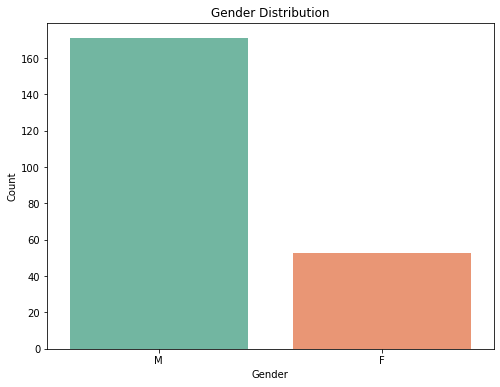

In [7]:
# Plot Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

College Performance Analysis

In [8]:
# Total Placements per College
placements_per_college = data['College Name'].value_counts()
print("Total Placements per College:")
print(placements_per_college)

Total Placements per College:
JECRC UNIVERSITY                             72
JECRC UNIVERSITY                             17
Amity University, Jaipur                      8
JECRC FOUNDATION                              5
Arya college of engineering                   4
                                             ..
Adgips                                        1
ISB&M                                         1
Shaheed Bhagat Singh State University         1
SP College, Sirohi                            1
mahakal institute of technology , ujjain      1
Name: College Name, Length: 119, dtype: int64


In [9]:
# Plot Total Placements per College as Pie Chart
# Determine the top 3 colleges
top_3_colleges = placements_per_college.head(3)
others = placements_per_college[3:].sum()


C:\Users\hp\AppData\Local\Temp/ipykernel_15640/351281165.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pie_data = top_3_colleges.append(pd.Series({'Others': others}))


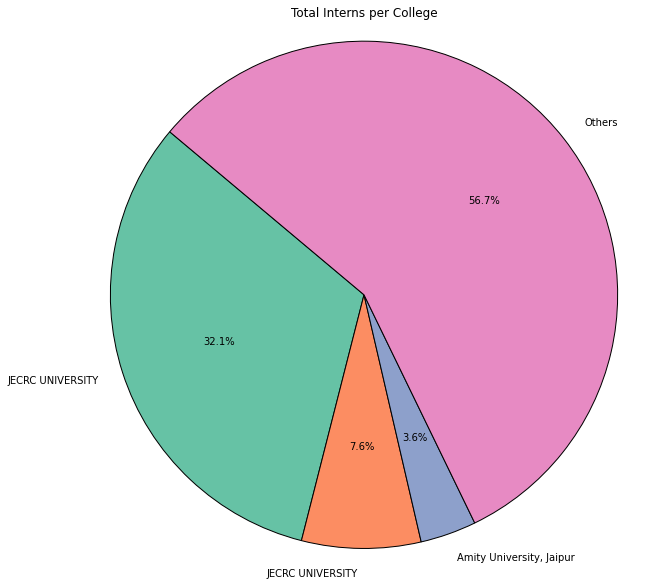

In [10]:
# Create a new series for the pie chart
pie_data = top_3_colleges.append(pd.Series({'Others': others}))

plt.figure(figsize=(10, 10))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"), 
        wedgeprops={'edgecolor': 'black'})
plt.title('Total Interns per College')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()